In [1]:
print('hello')

hello


In [2]:
!which python

/opt/conda/bin/python


In [3]:
!python --version

Python 3.11.6


In [4]:
!java -version

openjdk version "17.0.8.1" 2023-08-24
OpenJDK Runtime Environment (build 17.0.8.1+1-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 17.0.8.1+1-Ubuntu-0ubuntu122.04, mixed mode, sharing)


In [5]:
!which java

/usr/bin/java


In [8]:
pip show pyspark

Name: pyspark
Version: 3.5.0
Summary: Apache Spark Python API
Home-page: https://github.com/apache/spark/tree/master/python
Author: Spark Developers
Author-email: dev@spark.apache.org
License: http://www.apache.org/licenses/LICENSE-2.0
Location: /usr/local/spark/python
Requires: py4j
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
print("hello")

In [9]:
# SPARK_HOME
import os
os.environ.get('SPARK_HOME')

'/usr/local/spark'

In [10]:
# JAVA_HOME
os.environ.get('JAVA_HOME')

In [11]:
# PYTHONPATH
os.environ.get('PYTHONPATH')

'/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip:/usr/local/spark/python:'

In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession

# 프로젝트 이름
spark = SparkSession.builder.appName('pyspark example1').getOrCreate() # chaining
#SparkContext.SparkSession

In [4]:
spark # Spark UI 누르면 4041포트로 연결된게 보임

In [7]:
spark.stop() # 4041 포트 (4040포트로 연결해둔 것이 있어서)

In [8]:
from pyspark.sql import SparkSession

# 프로젝트 이름
spark = SparkSession.builder.appName('pyspark example1').getOrCreate() # chaining
#SparkContext.SparkSession

In [9]:
spark

In [10]:
data = [('Alice',1), ('Bob', 2), ('Charlie',3)]
data

[('Alice', 1), ('Bob', 2), ('Charlie', 3)]

In [11]:
type(data)

list

In [12]:
# spark에 있는 DataFrame 객체
# DataFrame 객체(분산객체)를 생성 <> 판다스의 데이터프레임이 아니다.
data1 = spark.createDataFrame(data, ['Name','Value'])

In [13]:
data1

DataFrame[Name: string, Value: bigint]

In [14]:
# executor가 가지고 있어서 못봄
data1[1][1]

Column<'Value[1]'>

In [15]:
data1.show()

+-------+-----+
|   Name|Value|
+-------+-----+
|  Alice|    1|
|    Bob|    2|
|Charlie|    3|
+-------+-----+



In [16]:
data1.filter(data1.Name == 'Bob').show()

+----+-----+
|Name|Value|
+----+-----+
| Bob|    2|
+----+-----+



In [19]:
data1.filter(data1.Value > 2)

DataFrame[Name: string, Value: bigint]

In [17]:
data1.filter(data1.Name == 'Bob').show()

+----+-----+
|Name|Value|
+----+-----+
| Bob|    2|
+----+-----+



In [18]:
data1.filter(data1.Value > 2).show()

+-------+-----+
|   Name|Value|
+-------+-----+
|Charlie|    3|
+-------+-----+



In [27]:
data1.createOrReplaceTempView('people')

In [28]:
spark.sql('select * from people')

DataFrame[Name: string, Value: bigint]

In [29]:
spark.sql('select * from people').show()

+-------+-----+
|   Name|Value|
+-------+-----+
|  Alice|    1|
|    Bob|    2|
|Charlie|    3|
+-------+-----+



In [36]:
spark.sql("select * from people where Name = 'Bob'").show() # bob은 안되고 Bob만 되네, 대소문자 구분 잘해야겠다리

+----+-----+
|Name|Value|
+----+-----+
| Bob|    2|
+----+-----+



In [33]:
spark.sql('select * from people where Value > 2').show()

+-------+-----+
|   Name|Value|
+-------+-----+
|Charlie|    3|
+-------+-----+



# RDD 객체 생성

In [20]:
spark = SparkSession.builder.appName('pyspark example1').getOrCreate()

In [21]:
# RDD 생성
rdd = spark.sparkContext.parallelize([1,2,3,4,5])
rdd

ParallelCollectionRDD[13] at readRDDFromFile at PythonRDD.scala:289

In [22]:
data1

DataFrame[Name: string, Value: bigint]

In [23]:
# rdd 객체를 출력하는 함수 (N개를 무조건 지정해줘야 된다)
rdd.take(5)

[1, 2, 3, 4, 5]

In [24]:
# map 연산 : rdd 값으로 연산
squared_rdd = rdd.map(lambda x : x*x)
squared_rdd

PythonRDD[16] at RDD at PythonRDD.scala:53

In [25]:
squared_rdd.take(3)

[1, 4, 9]

In [26]:
squared_rdd.collect()

[1, 4, 9, 16, 25]

# MLlib

In [41]:
from pyspark.ml.regression import LinearRegression # sklearn이 아닌 pyspark.ml 안에 있는걸 가지고 오네.

In [40]:
import numpy as np # 피처랑 , 넣으려고.

In [39]:
from pyspark.ml.feature import VectorAssembler

In [42]:
data_age = [('Alice',25), ('Bob', 30), ('Charlie',33)]
data_age

[('Alice', 25), ('Bob', 30), ('Charlie', 33)]

In [43]:
# spark에 있는 DataFrame 객체
# DataFrame 객체(분산객체)를 생성 <> 판다스의 데이터프레임이 아니다.
data2 = spark.createDataFrame(data_age, ['Name','Age'])

In [45]:
assembler = VectorAssembler(inputCols=['Age'], outputCol='features')
vector_df = assembler.transform(data2)
vector_df

DataFrame[Name: string, Age: bigint, features: vector]

In [50]:
lr = LinearRegression(featuresCol='features', labelCol='Age')
model=lr.fit(vector_df)

In [51]:
pred = model.transform(vector_df)
pred

DataFrame[Name: string, Age: bigint, features: vector, prediction: double]

In [52]:
pred.show()

+-------+---+--------+-----------------+
|   Name|Age|features|       prediction|
+-------+---+--------+-----------------+
|  Alice| 25|  [25.0]|24.99999999999993|
|    Bob| 30|  [30.0]|30.00000000000001|
|Charlie| 33|  [33.0]|33.00000000000006|
+-------+---+--------+-----------------+



In [56]:
spark.stop()

# Streaming

In [103]:
from pyspark.sql.functions import explode, split

In [70]:
spark = SparkSession.builder.appName('pyspark example1').getOrCreate()

In [60]:
lines = spark.readStream.format('socket').option('host','localhost').option('port',9999).load() # STREAMING DATA LOAD

aaaa bbbn cccc hello

In [ ]:
words = lines.select(explode(split(lines.value, '')).alias('word'))

In [66]:
spark.stop()

# RDD에서 다룰 수 있는 데이터 타입   
1. 비정형 데이터 - ...json, txt, str
2. 정형 데이터 - 리스트, cvs, table

In [71]:
# RDD [str]
rdd1 = spark.sparkContext.textFile('learning_spark_data/log.txt')
rdd1

learning_spark_data/log.txt MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [72]:
rdd1.take(3)

['2025-07-31 10:00:01 INFO User=kim ACTION=LOGIN RESULT=SUCCESS',
 '2025-07-31 10:05:43 WARN User=lee ACTION=DOWNLOAD RESULT=FAIL',
 '2025-07-31 10:08:22 INFO User=park ACTION=UPLOAD RESULT=SUCCESS']

In [ ]:
#RDD[dict] - data.json

In [79]:
import json
rdd2 = spark.sparkContext.textFile('learning_spark_data/data.json').map(json.loads)
rdd2

PythonRDD[13] at RDD at PythonRDD.scala:53

In [80]:
rdd2.take(3)

[{'user': 'kim',
  'action': 'login',
  'result': 'success',
  'time': '2025-07-31 10:00:01'},
 {'user': 'lee',
  'action': 'download',
  'result': 'fail',
  'time': '2025-07-31 10:05:43'},
 {'user': 'park',
  'action': 'upload',
  'result': 'success',
  'time': '2025-07-31 10:08:22'}]

In [97]:
spark.stop()

# RDD의 데이터 읽기 패턴   
1. RDD 생성 - type 지정하지 않는다.
2. 형식 변환 - map() 함수로 변환
3. 데이터 출력 - take(n) 

# SparkContext 객체

1. SparkSession.getOrCreate() -> 세선객체로부터 사전에 설정된 변수에 맞춰 컨텍스트 생성
2. SparkConf + SparkContext ->  저수준 연산에 적합한 방식

In [6]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setMaster('local').setAppName('country-student-counts2')
conf

In [3]:
spark = SparkContext(conf=conf).getOrCreate()

In [111]:
from pyspark.sql import SparkSession

In [4]:
spark.getConf().getAll()

[('spark.master', 'local'),
 ('spark.app.startTime', '1754027323649'),
 ('spark.driver.port', '34749'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.app.nam

In [5]:
spark.stop()

In [1]:
import os
os.getcwd()

'/home/jovyan/work'

In [2]:
dir = os.path.join(os.getcwd(), 'learning_spark_data')
dir

'/home/jovyan/work/learning_spark_data'

In [3]:
filename = 'xAPI-Edu-Data.csv'
filepath = os.path.join(dir, filename)
filepath

'/home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv'

## 외부저장소에서 데이터를 로드, RDD생성

In [7]:
from pyspark import SparkConf, SparkContext
spark =SparkContext(conf = conf).getOrCreate()

In [8]:
lines = spark.textFile('file:///' + filepath.replace('\\','/'))
lines

file:////home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [9]:
lines.take(1)

['gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class']

In [10]:
lines.count()

481

# 데이터의 처리

In [11]:
header = lines.first()
header

'gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class'

In [12]:
datas = lines.filter(lambda row: row != header)
datas.take(3)

['M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L']

In [13]:
countries = datas.map(lambda row:row.split(',')[2])
countries

PythonRDD[6] at RDD at PythonRDD.scala:53

In [14]:
countries.take(3)

['KuwaIT', 'KuwaIT', 'KuwaIT']

In [15]:
result = countries.countByValue()
result

defaultdict(int,
            {'KuwaIT': 180,
             'lebanon': 19,
             'Egypt': 9,
             'SaudiArabia': 16,
             'USA': 16,
             'Jordan': 176,
             'venzuela': 1,
             'Iran': 6,
             'Tunis': 9,
             'Morocco': 4,
             'Syria': 6,
             'Iraq': 22,
             'Palestine': 10,
             'Lybia': 6})

In [16]:
result.items()

dict_items([('KuwaIT', 180), ('lebanon', 19), ('Egypt', 9), ('SaudiArabia', 16), ('USA', 16), ('Jordan', 176), ('venzuela', 1), ('Iran', 6), ('Tunis', 9), ('Morocco', 4), ('Syria', 6), ('Iraq', 22), ('Palestine', 10), ('Lybia', 6)])

In [19]:
sorted(result.items(), key = lambda x :x[1], reverse=True)

[('KuwaIT', 180),
 ('Jordan', 176),
 ('Iraq', 22),
 ('lebanon', 19),
 ('SaudiArabia', 16),
 ('USA', 16),
 ('Palestine', 10),
 ('Egypt', 9),
 ('Tunis', 9),
 ('Iran', 6),
 ('Syria', 6),
 ('Lybia', 6),
 ('Morocco', 4),
 ('venzuela', 1)]

In [20]:
sorted(result.items(), key = lambda x :x[1], reverse=True)[:3]

[('KuwaIT', 180), ('Jordan', 176), ('Iraq', 22)]

In [22]:
total_su = sum(result.values()) # 480명이다
total_su

480

In [24]:
# 비율 계산
ratio = { k : round(v / total_su * 100, 2) for k,v in result.items() }
ratio

{'KuwaIT': 37.5,
 'lebanon': 3.96,
 'Egypt': 1.88,
 'SaudiArabia': 3.33,
 'USA': 3.33,
 'Jordan': 36.67,
 'venzuela': 0.21,
 'Iran': 1.25,
 'Tunis': 1.88,
 'Morocco': 0.83,
 'Syria': 1.25,
 'Iraq': 4.58,
 'Palestine': 2.08,
 'Lybia': 1.25}

<BarContainer object of 14 artists>

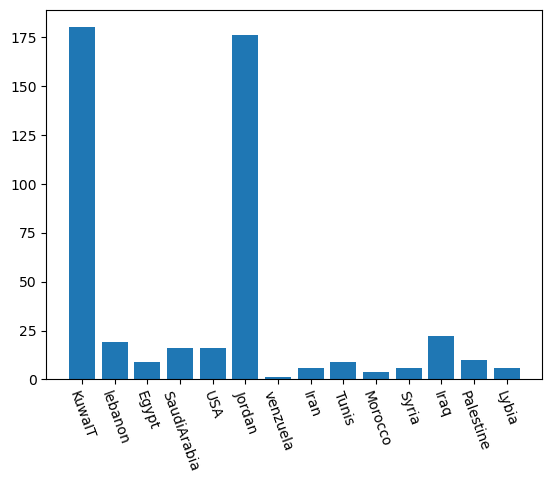

In [31]:
import matplotlib.pyplot as plt
countries = list(result.keys())
counts =  list(result.values())
plt.xticks(rotation=-70)
plt.bar(countries, counts)

In [47]:
spark.stop()

# RDD 연습

In [2]:
# 2. RDD 생성 - 기본 리스트
data = ["KuwaIT", "lebanon", "Jordan", "Jordan", "USA", "Egypt", 
        "Jordan", "USA", "Iran", "Iran", "KuwaIT"]

In [12]:
#소문자로 변환
from pyspark import SparkContext

sc = SparkContext.getOrCreate()

rdd = sc.parallelize(data)  # RDD로 변환
countries_lower = rdd.map(lambda x: x.lower())
print(lower_rdd.collect())

['kuwait', 'lebanon', 'jordan', 'jordan', 'usa', 'egypt', 'jordan', 'usa', 'iran', 'iran', 'kuwait']


In [10]:
rdd

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:289

In [4]:
# 소문자로 변환  lower() 함수

In [9]:
# 'jordan'만 추출하기
jordan_rdd = lower_rdd.filter(lambda x: x == "jordan").take(1)
print( jordan_rdd)

['jordan']


In [8]:
# 개수 세기
# count 액션을 사용하여 RDD에 포함된 원소의 총 개수를 계산합니다.
jordan_count = jordan_rdd.count()

print(jordan_count)

3


# 국가별 뭐시기

In [25]:
from pyspark.sql import SparkSession

In [26]:
spark = SparkSession.builder.appName('pyspark example2').getOrCreate() 

In [27]:
data = ["KuwaIT", "lebanon", "Jordan", "Jordan", "USA", "Egypt", 
        "Jordan", "USA", "Iran", "Iran", "KuwaIT"]
countries = spark.sparkContext.parallelize(data)
countries

ParallelCollectionRDD[30] at readRDDFromFile at PythonRDD.scala:289

In [13]:
country_pairs = countries_lower.map(lambda x: (x,1))
country_pairs.take(1)

[('kuwait', 1)]

In [15]:
country_counts = country_pairs.reduceByKey(lambda a,b: a+b)
country_counts.take(2)

[('kuwait', 2), ('lebanon', 1)]

In [16]:
country_counts.take(6)

[('kuwait', 2),
 ('lebanon', 1),
 ('egypt', 1),
 ('jordan', 3),
 ('usa', 2),
 ('iran', 2)]

In [17]:
country_counts.sortByKey().collect() # key 순서대로 sort

[('egypt', 1),
 ('iran', 2),
 ('jordan', 3),
 ('kuwait', 2),
 ('lebanon', 1),
 ('usa', 2)]

In [19]:
country_counts.sortBy(lambda X:X[1], ascending=False).collect() #value 순서대로 sort

[('jordan', 3),
 ('kuwait', 2),
 ('usa', 2),
 ('iran', 2),
 ('lebanon', 1),
 ('egypt', 1)]

In [29]:
countries.reduce(lambda a, b: a+','+b) #변환

'KuwaIT,lebanon,Jordan,Jordan,USA,Egypt,Jordan,USA,Iran,Iran,KuwaIT'

In [ ]:
# 저장소에 저장하기

In [32]:
import os
import shutil

In [30]:
output_path = 'output/countries_result'

In [34]:
if os.path.exists(output_path):
    shutil.rmtree(output_path)
countries.saveAsTextFile(output_path) # 저장소 경로